IMPORT LIBRARY

In [1]:
import numpy as np
import pandas as pd

LOAD DATASET

In [2]:
heart_data = pd.read_csv('heart.csv')

In [3]:
heart_data.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


NORMALISASI DATA

In [5]:
numerical = []
categorical = []

for col in heart_data.columns:
    if heart_data[col].dtype=="float64":
        numerical.append(col)
    else:
        categorical.append(col)

for col in heart_data.columns:
    if col in numerical:
        heart_data[col].fillna(heart_data[col].median(), inplace=True)
    else:
        heart_data[col].fillna(heart_data[col].mode()[0], inplace=True)

In [6]:
numerical

['glucose', 'kcm', 'troponin']

In [7]:
categorical

['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'class']

In [8]:
heart_data['class'].value_counts()

class
positive    810
negative    509
Name: count, dtype: int64

PISAHKAN DATA ATRIBUT DENGAN LABEL

In [9]:
ind_col = [col for col in heart_data.columns if col != 'class']
dep_col = 'class'

heart_data[dep_col].value_counts()

class
positive    810
negative    509
Name: count, dtype: int64

TRANSFORMASI DATASET

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical:
    heart_data[col] = le.fit_transform(heart_data[col])

In [11]:
heart_data['class'] = le.fit_transform(heart_data['class'])

In [12]:
x = heart_data[ind_col]
y = heart_data[dep_col]

heart_data.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,46,1,22,85,44,160.0,1.80,0.012,0
1,3,1,50,23,7,296.0,6.75,1.060,1
2,37,1,20,85,38,270.0,1.99,0.003,0
3,46,1,26,45,16,270.0,13.87,0.122,1
4,37,1,20,37,26,300.0,1.08,0.003,0


In [13]:
heart_data.to_csv('heartnew.csv', index=False)

MEMBUAT MODEL TRAINING

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

MEMBUAT MODEL DECISION TREE

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"akurasi data testing = {dtc_acc} \n")

print(f"consufion matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))} \n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn, fp, fn, tp = confusion.ravel()
print(f"classification report : \n{classification_report(y_test, dtc.predict(x_test))}")

akurasi data training = 0.9981042654028436
akurasi data testing = 0.9772727272727273 

consufion matrix : 
[[ 98   3]
 [  3 160]] 

classification report : 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       101
           1       0.98      0.98      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



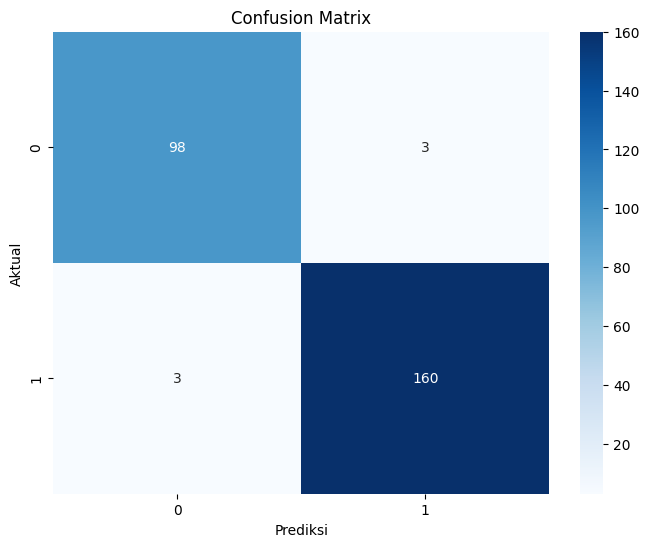

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

BUAT MODEL PREDIKSI

In [17]:
input_data = (46,1,22,85,44,160.0,1.8,0.012)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print ('Pasien tidak terkena penyakit jantung')
else:
    print ('Pasien terkena penyakit jantung')

[0]
Pasien tidak terkena penyakit jantung


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


VISUALISASI POHON KEPUTUSAN

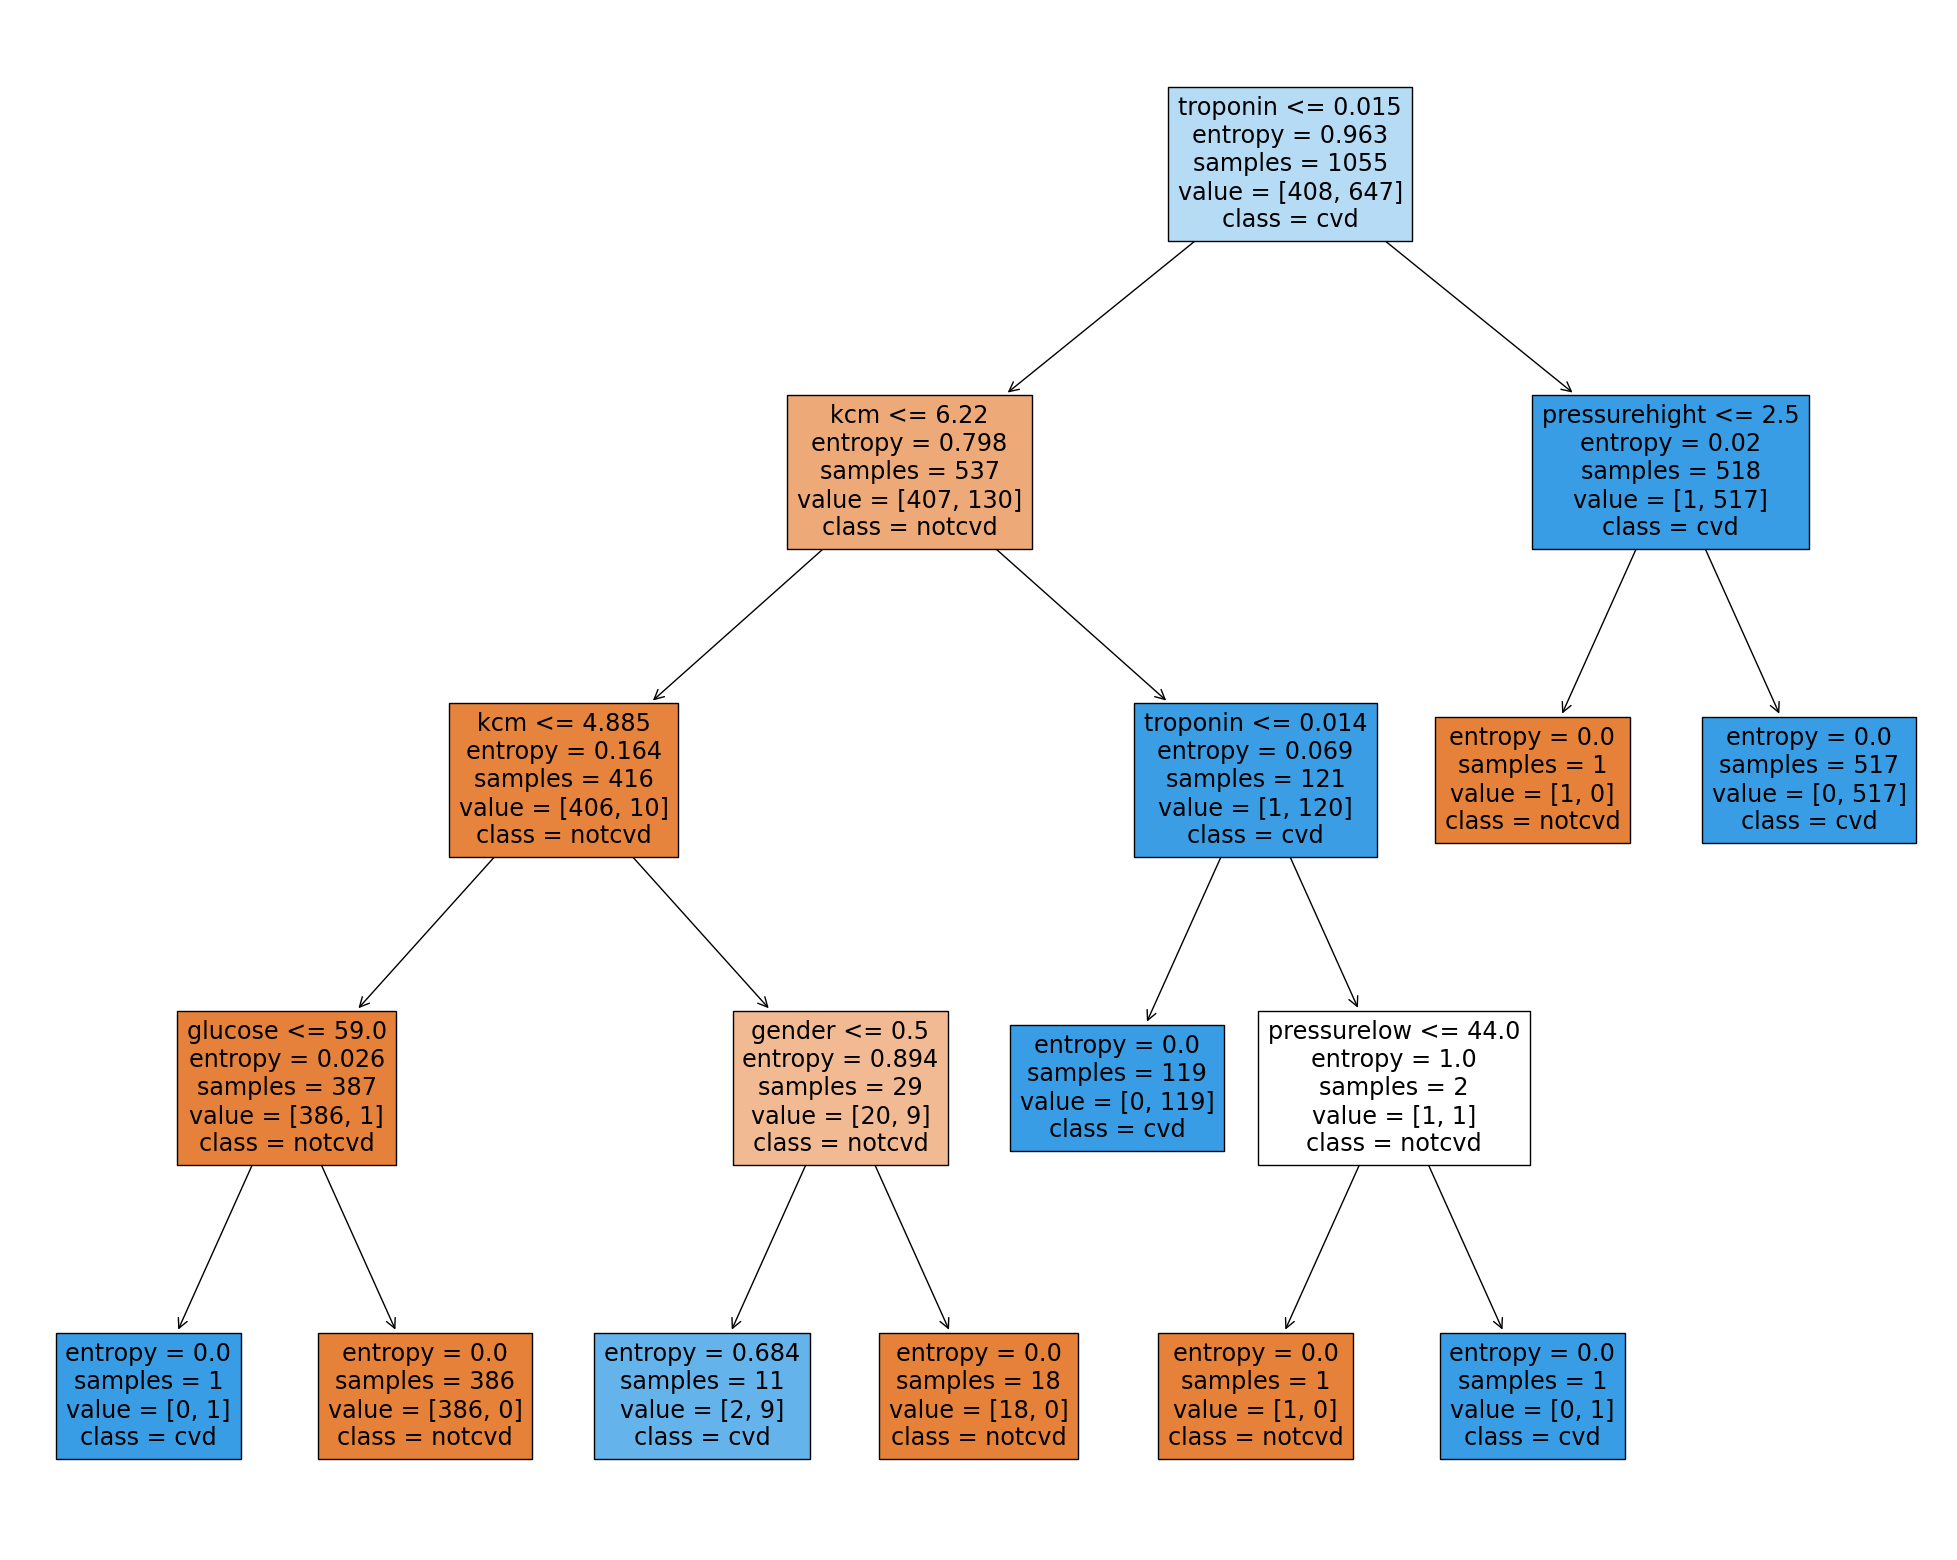

In [18]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model,
                     feature_names=ind_col,
                     class_names=['notcvd','cvd'],
                     filled=True)

SIMPAN MODEL

In [19]:
import pickle
filename = 'penyakit_jantung.sav'
pickle.dump(model,open(filename, 'wb'))